<a href="https://colab.research.google.com/github/SantiagoUNAL/ML-Applications-in-Actuarial-Sciences/blob/main/Preparaci%C3%B3n_de_los_datos_Proyecto_1_(Santiago_Prieto_Betancur).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CRISP-DM Fase de Entendimiento de los datos

In [6]:
# from google.colab import files
# uploaded = files.upload()

In [7]:
# import io
# import pandas as pd
# df = pd.read_csv(io.BytesIO(uploaded['medmal_pos.csv']))
# Dataset is now stored in a Pandas Dataframe

In [8]:
import io
import pandas as pd

url = 'https://raw.githubusercontent.com/SantiagoUNAL/ML-Applications-in-Actuarial-Sciences/main/medmal_pos.csv'
df = pd.read_csv(url)

En esta parte se exporto la base de datos "medmal_pos.csv" desde el repositorio de GitHub.

In [9]:
df

,GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_F2,CumPaidLoss_F2,BulkLoss_F2,EarnedPremDIR_F2,EarnedPremCeded_F2,EarnedPremNet_F2,Single,PostedReserve97_F2
0,669,Scpie Indemnity Co,1988,1988,1,121905,2716,97966,129104,-6214,135318,0,344558
1,669,Scpie Indemnity Co,1988,1989,2,112211,24576,64117,129104,-6214,135318,0,344558
2,669,Scpie Indemnity Co,1988,1990,3,103226,43990,39008,129104,-6214,135318,0,344558
3,669,Scpie Indemnity Co,1988,1991,4,99599,59722,20736,129104,-6214,135318,0,344558
4,669,Scpie Indemnity Co,1988,1992,5,96006,71019,13599,129104,-6214,135318,0,344558
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,44504,California Healthcare Ins Co Inc,1997,2002,6,3970,3971,-1,9711,5704,4007,1,15719
3396,44504,California Healthcare Ins Co Inc,1997,2003,7,3965,3965,0,9711,5704,4007,1,15719
3397,44504,California Healthcare Ins Co Inc,1997,2004,8,3965,3965,0,9711,5704,4007,1,15719
3398,44504,California Healthcare Ins Co Inc,1997,2005,9,3965,3965,0,9711,5704,4007,1,15719


## Descripción de los datos

A continuación presentaremos todo el análisis correspondiente a los datos disponibles para realizar ciencia de datos. En esta parte del proyecto vamos a visualizar y explorar los datos que son parte del proyecto a desarrollar.

En primer lugar, vamos a realizar una descripción general de la base de datos y de la metadata. Estos datos almacenan la información de los triangulos de perdida que pueden ser usados en estudios de reportes de reservas. Los datos incluyen las principales lineas de negocio tanto personales como comerciales de los aseguradores de accidentes inmobiliarios de Estados Unidos. Los reclamos o reportes de los datos provienen de la base de datos Schedule P - Analysis of Losses and Loss Expenses in the National Association of Insurance Commissioners (NAIC).

Es importante dentro de la descripción de los datos brindar un análisis de la metadata que nos brinda la información necesaria para entender cual es el contenido de los datos que se analizarán en el proyecto.

Dentro de la base de datos de reportes hechos por malas practicas médicas se encuentran incluidas las siguientes variables que fueron extraidas de cuatro partes diferentes en el Schedule P.

**Parte 1** - Prima ganada y algunos datos resumidos de pérdidas

**Parte 2** - Triángulos de pérdida neta incurrida

**Parte 3** - Triángulos de pérdida neta pagada

**Parte 4** - Reservas Bulk e IBNR (Incurred but not reported) sobre pérdidas netas y gastos de contención de costos

Los triángulos consisten en pérdidas netas de reaseguramiento y es muy frecuente que grupos de aseguramiento tengan acuerdos mutuos de reaseguramiento entre las empresas del grupo. Por lo tanto, la base de datos se estructuro de tal forma que los registros de las entidades correspondan a un grupo de aseguradoras o verdaderas aseguradoras que operen individualmente.

De acuerdo con Casualty Actuarial Society (CAS) el proceso de preparación de los datos tomo los siguientes tres pasos:

**Paso 1:** Los datos del triángulo se extrajeron del Schedule P del año 1997. Cada triangulo incluye reportes de 10 años de accidentes (1988-1997) y 10 retrasos en el desarrollo. Estos datos son los datos de entrenamiento que se pueden usar para desarrollar modelos.

**Paso 2:** Se completaron los triangulos del Schedule P del año 1997 con los resultados del Schedule P de los años siguientes. Especificamente, los datos de los accidentes para el año 1989 fueron extraidos del Schedule P del año 1998, los datos de los accidentes para el año 1990 fueron extraidos del Schedule P del año 1999 y así sucesivamente hasta que los datos de los accidentes para el año 1997 fueron extraidos del Schedule P del año 2006. Los datos en los triangulos inferiores pueden ser usados para validar los modelos desarrollados.

**Paso 3:** Muestreo. Se realizó un análisis preliminar para garantizar la calidad de la base de datos. Las aseguradoras que permanecieron en la última versión de la base de datos cumplian los siguientes criterios:


1.   La aseguradora estaba disponible tanto en el Schedule P del año 1997 y en los años posteriores.
2.   Las observaciones (10 años de accidentalidad y 10 retrasos en el desarrollo) estaban completos para la aseguradora.
3.   Los reportes del Schedule P del año 1997 coincidian con aquellos de los años siguientes.
4.   Las primas netas emitidas no son cero para todos los años.

## Configuración de los metadatos

La base de datos de reportes hechos por malas practicas médicas contiene 3400 datos de los cuales se almacenan la información de 34 entidades que corresponden a un grupo de aseguradoras o verdaderas aseguradoras que operen individualmente y cada una de estas entidades tiene registrado los reportes atendidos en los años de accidentalidad de 1988 a 1997 (10 años) con 10 años de retraso en el desarrollo. Adicionalmente, las etiquetas de cada columna que se incluye en la base de datos son las siguientes:



1.   **GRCODE NAIC** código de la compañia (incluyendo grupo de aseguradoras o verdaderas aseguradoras que operen individualmente)
2.   **GRNAME NAIC** nombre de la compañia (incluyendo grupo de aseguradoras o verdaderas aseguradoras que operen individualmente)
3.   **AccidentYear** Año del accidente(1988 a 1997)
4.   **DevelopmentYear** Año de desarrollo (1988 a 1997)
5.   **DevelopmentLag** Retraso en el desarrollo (usa la siguiente fórmula $AccidentYear - 1987 + DevelopmentYear - 1987 - 1$)
6.   **IncurLoss_F2** Pérdidas incurridas y gastos asignados reportados al final del año
7.   **CumPaidLoss_F2** Pérdidas pagadas acumuladas y gastos asignados al final del año
8.   **BulkLoss_F2** Reservas Bulk e IBNR sobre pérdidas netas y gastos de defensa y contención de costos reportados al final del año
9.   **PostedReserve97_F2** Reservas contabilizadas en el año 1997 tomadas del Anexo de Suscripción e Inversiones (Underwriting and Investment Exhibit).
10.   **EarnedPremDIR_F2** Primas devengadas en el año incurrido: directas y asumidas
11.   **EarnedPremCeded_F2** Primas devengadas en el año incurrido: cedidas
12.   **EarnedPremNet_F2** Primas devengadas en el año en que se incurrió: netas
13.   **Single** 1 indica una sola entidad, 0 indica una aseguradora grupal

Es importante tener presente que esta base de datos tiene variables categoricas como **GRNAME NAIC** las cuales merecen un tratamiento diferente en la fase de modelado. Sin embargo, este tipo de variable se puede omitir ya que el código de la compañia (**GRCODE NAIC**) almacena la misma información en un formato numérico.







In [10]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd

# df.loc[df['GRCODE']== 669]
df.loc[df['DevelopmentLag']== 1]

,GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_F2,CumPaidLoss_F2,BulkLoss_F2,EarnedPremDIR_F2,EarnedPremCeded_F2,EarnedPremNet_F2,Single,PostedReserve97_F2
0,669,Scpie Indemnity Co,1988,1988,1,121905,2716,97966,129104,-6214,135318,0,344558
10,669,Scpie Indemnity Co,1989,1989,1,122679,3835,104402,131948,20010,111938,0,344558
20,669,Scpie Indemnity Co,1990,1990,1,118157,4838,99473,112742,13449,99293,0,344558
30,669,Scpie Indemnity Co,1991,1991,1,117981,4456,93508,101814,5331,96483,0,344558
40,669,Scpie Indemnity Co,1992,1992,1,131059,5970,103660,94694,-3914,98608,0,344558
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3350,44504,California Healthcare Ins Co Inc,1993,1993,1,3310,51,2449,11248,6433,4815,1,15719
3360,44504,California Healthcare Ins Co Inc,1994,1994,1,5373,255,2200,13341,6476,6865,1,15719
3370,44504,California Healthcare Ins Co Inc,1995,1995,1,3796,32,1917,10190,4967,5223,1,15719
3380,44504,California Healthcare Ins Co Inc,1996,1996,1,3383,74,2002,9396,6351,3045,1,15719


In [11]:
df.loc[df['GRNAME']== 'Overseas Partners Us Reins Co']

,GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_F2,CumPaidLoss_F2,BulkLoss_F2,EarnedPremDIR_F2,EarnedPremCeded_F2,EarnedPremNet_F2,Single,PostedReserve97_F2
500,10019,Overseas Partners Us Reins Co,1988,1988,1,0,0,0,0,0,0,1,0
501,10019,Overseas Partners Us Reins Co,1988,1989,2,0,0,0,0,0,0,1,0
502,10019,Overseas Partners Us Reins Co,1988,1990,3,0,0,0,0,0,0,1,0
503,10019,Overseas Partners Us Reins Co,1988,1991,4,0,0,0,0,0,0,1,0
504,10019,Overseas Partners Us Reins Co,1988,1992,5,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,10019,Overseas Partners Us Reins Co,1997,2002,6,0,0,0,0,0,0,1,0
596,10019,Overseas Partners Us Reins Co,1997,2003,7,0,0,0,0,0,0,1,0
597,10019,Overseas Partners Us Reins Co,1997,2004,8,0,0,0,0,0,0,1,0
598,10019,Overseas Partners Us Reins Co,1997,2005,9,0,0,0,0,0,0,1,0


## Exploración de los datos y verificación de calidad de los datos

En esta primera parte desarrollaremos código que nos permita tratar los datos de una forma adecuada. A continuación se implementa un código que permite extraer el nombre de todas las aseguradoras.

In [12]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd

r = df['GRNAME']
Names = []
for i in range(34):
  print(r[100*i])
  Names = np.append(Names,[r[100*i]])


np.size(Names)

Scpie Indemnity Co
Promutual Grp
Great Amer Grp
Nationwide Grp
Markel Corp Grp
Overseas Partners Us Reins Co
Eastern Dentists Ins Co RRG
American Assoc Of Othodontists RRG
Controlled Risk Ins Co Of VT Inc
Texas Medical Ins Co
MCIC VT Inc RRG
Franklin Cas Ins Co RRG
Homestead Ins Co
Campmed Cas & Ind Co Inc MD
Community Blood Cntr Exch RRG
Underwriters At Lloyds London
NCMIC Ins Co
National American Ins Co
Michigan Professional Ins Exch
Nichido Fire & Marine Ins Co Ltd
Texas Hospital Ins Exch
State Volunteer Mut Ins Co
MHA Ins Co
Health Care Ind Inc
National Guardian RRG Inc
Preferred Professional Ins Co
Medical Mut Ins Co Of ME
Utah Medical Ins Assoc
Seguros Triples Inc
Dentists Ins Co
Physicians Recip Insurers
Louisiana Med Mut Ins Co
Clinic Mut Ins Co RRG
California Healthcare Ins Co Inc


34

En esta parte haremos el mismo procedimiento al código anterior con el fin de extraer los códigos de registro de cada aseguradora.

In [13]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd

r = df['GRCODE']
Codes = []
for i in range(34):
  print(r[100*i])
  Codes = np.append(Codes,[r[100*i]])


np.size(Codes)

669
683
841
1406
7854
10019
10115
10232
10341
10393
10697
10842
11460
12260
13893
15792
15865
23663
31429
32301
32514
33049
33111
35904
36072
36234
36277
36676
40568
40975
41467
43656
43770
44504


34

In [14]:
pip install chainladder

In [15]:
import chainladder as cl

A continuación se presenta un análisis descriptivo de las variables a tratar durante el proyecto de ciencia de datos con el fin de brindar una mejor comprensión e intuición de los datos disponibles. De esta manera, a continuación se presentan los histogramas de las variables de interés.

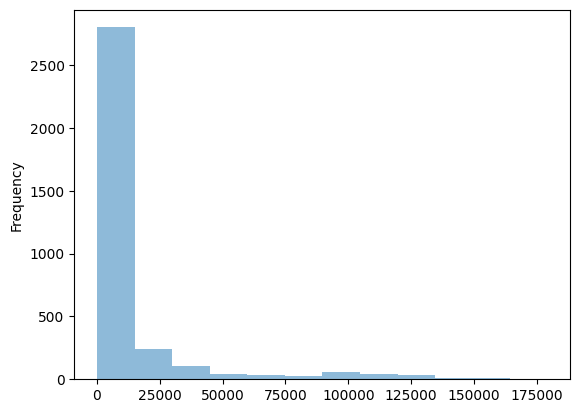

In [16]:
df_IncurLoss_F2 = df['IncurLoss_F2']
ax1 = df_IncurLoss_F2.plot.hist(bins=12, alpha=0.5)

Es importante resaltar que la variable de interes más importante a trabajar durante el proyecto es la variable **CumPaidLoss_F2** cuyo histograma muestra que una gran cantidad de datos procedentes de esta variable son pequeños o cercanos a cero, como se muestra a continuación

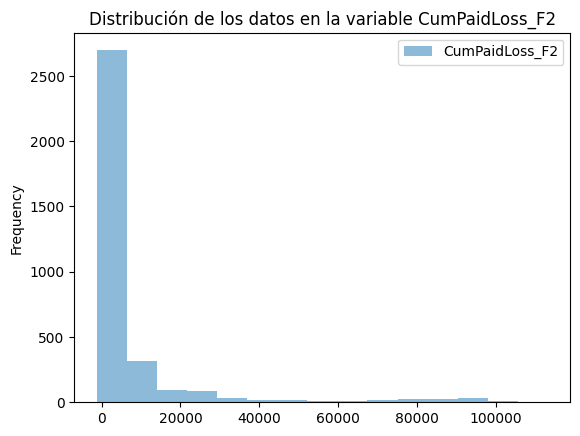

In [17]:
df_CumPaidLoss_F2 = df['CumPaidLoss_F2']
ax2 = df_CumPaidLoss_F2.plot.hist(bins=15, alpha=0.5)
plt.title("Distribución de los datos en la variable CumPaidLoss_F2")
plt.legend()


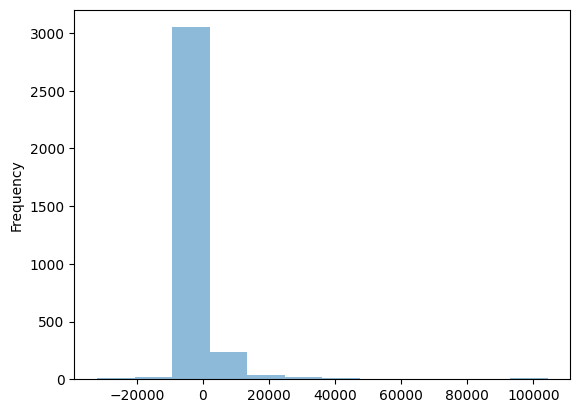

In [18]:
df_BulkLoss_F2 = df['BulkLoss_F2']
ax3 = df_BulkLoss_F2.plot.hist(bins=12, alpha=0.5)

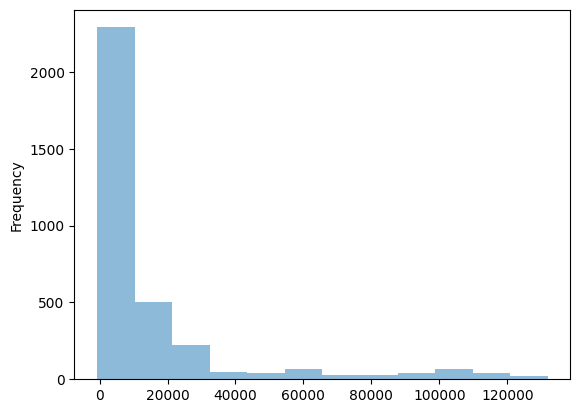

In [19]:
df_EarnedPremDIR_F2 = df['EarnedPremDIR_F2']
ax4 = df_EarnedPremDIR_F2.plot.hist(bins=12, alpha=0.5)

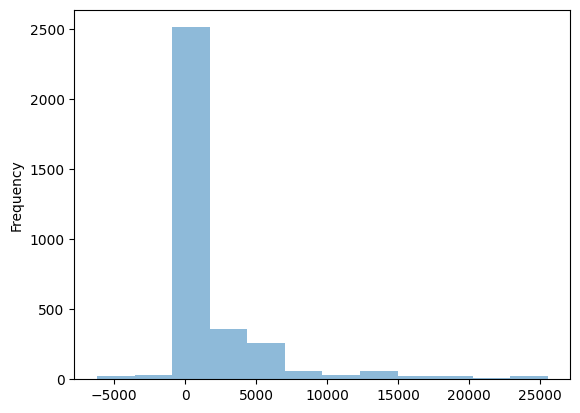

In [20]:
df_EarnedPremCeded_F2 = df['EarnedPremCeded_F2']
ax5 = df_EarnedPremCeded_F2.plot.hist(bins=12, alpha=0.5)

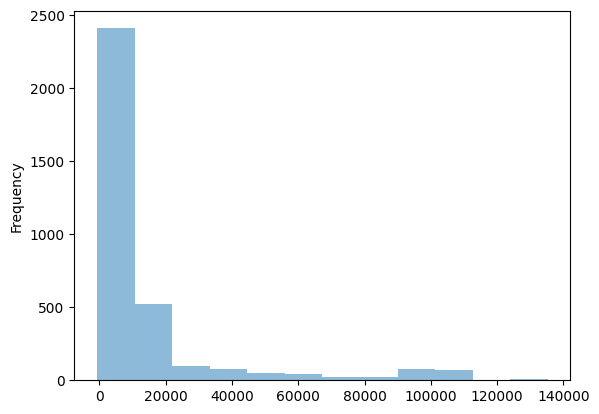

In [21]:
df_EarnedPremNet_F2 = df['EarnedPremNet_F2']
ax6 = df_EarnedPremNet_F2.plot.hist(bins=12, alpha=0.5)

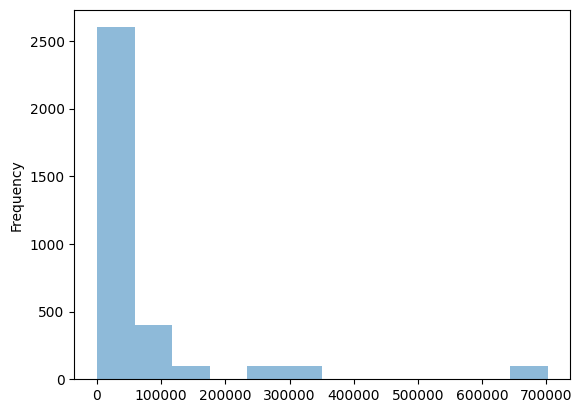

In [22]:
df_PostedReserve97_F2 = df['PostedReserve97_F2']
ax7 = df_PostedReserve97_F2.plot.hist(bins=12, alpha=0.5)

En esta parte podemos observar como es la frecuencia de valores observados en las variables **IncurLoss_F2**, **CumPaidLoss_F2**, **BulkLoss_F2**, **EarnedPremDIR_F2**, **EarnedPremCeded_F2**,**EarnedPremNet_F2** y **PostedReserve97_F2** respectivamente.

A continuación se procederá a crear un entorno basado en los siguientes diccionarios, que permitan dar un tratamiento más adecuado a los datos disponibles y que ademas nos faculten en la transformación de los datos actuales hacia los triangulos de perdida.

In [23]:
pip install chainladder

In [24]:
import chainladder as cl

In [25]:
# Run-off rectangles in the variable CumPaidLoss_F2 for all the entities
dictionary2 = {}
for i in range(34):
  df1 = df.loc[df['GRCODE']== Codes[i]]
  # df2 = df1.loc[df['DevelopmentYear'] <= 1997]

  raa_CumPaidLoss_F2 = cl.Triangle(
      df1,
      origin="AccidentYear",
      development="DevelopmentYear",
      columns="CumPaidLoss_F2",
      cumulative=False,
  )

  dictionary2[Names[i]] = raa_CumPaidLoss_F2

In [26]:
dictionary2['Overseas Partners Us Reins Co']

,12,24,36,48,60,72,84,96,108,120,132,144,156,168,180,192,204,216,228
1988,,,,,,,,,,,,,,,,,,,
1989,,,,,,,,,,,,,,,,,,,
1990,,,,,,,,,,,,,,,,,,,
1991,,,,,,,,,,,,,,,,,,,
1992,,,,,,,,,,,,,,,,,,,
1993,,,,,,,,,,,,,,,,,,,
1994,,,,,,,,,,,,,,,,,,,
1995,,,,,,,,,,,,,,,,,,,
1996,,,,,,,,,,,,,,,,,,,
1997,,,,,,,,,,,,,,,,,,,


In [27]:
import numpy as np

#Dictionary of square matrices in the variable CumPaidLoss_F2 for all the entities
dictionary3 = {}
for i in range(34):
  df1 = dictionary2[Names[i]].to_frame()
  A = df1.to_numpy()
  A[np.isnan(A)] = 0
  A = np.array(A)

  A = A[0:10,0:10]
  dictionary3[Names[i]] = A

In [28]:
dictionary3['Overseas Partners Us Reins Co']

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Ahora procederemos a realizar los análisis descriptivos y exploratorios de los triangulos de perdida en la variable **CumPaidLoss_F2** para todas las aseguradoras con el fin de comprender la naturaleza de los datos y la dispersión que existe entre los mismos. De esta forma, en primer lugar observaremos en el siguiente código como se comporta cada aseguradora con respecto al comportamiento promedio de todas las aseguradoras.

Length of run-off rectangles dictionary : 34

 
 The mean of run-off rectangles is :  [[  174.52941176  1389.94117647  2795.70588235  3871.05882353
   4856.38235294  5351.08823529  5835.14705882  6060.82352941
   6275.70588235  6389.38235294]
 [  277.44117647  1525.14705882  2911.05882353  4387.32352941
   5164.35294118  5811.47058824  6213.          6411.35294118
   6550.20588235  6601.61764706]
 [  352.82352941  1610.05882353  3498.94117647  4814.55882353
   5599.73529412  6293.29411765  6623.5         6932.85294118
   7107.79411765  7191.29411765]
 [  279.91176471  2159.41176471  4304.32352941  5860.64705882
   7205.5         7656.85294118  8115.38235294  8400.85294118
   8587.61764706  8657.58823529]
 [  367.02941176  2300.35294118  4629.41176471  6175.26470588
   7177.          7853.14705882  8338.67647059  8582.26470588
   8846.26470588  8981.61764706]
 [  536.14705882  2667.94117647  4891.91176471  6702.67647059
   8124.55882353  9014.55882353  9433.5         9838.29411765
  100

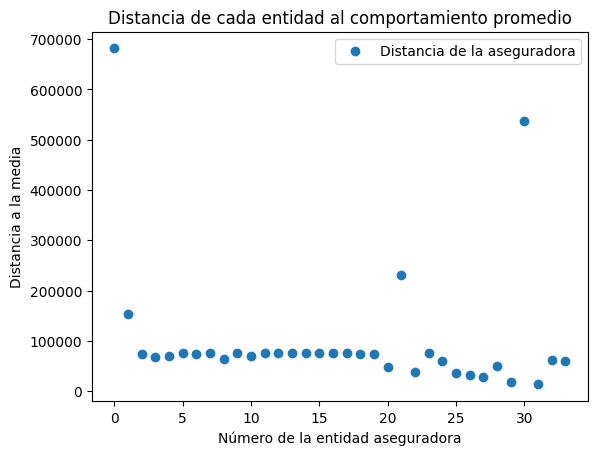

In [29]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd

# This code makes a descriptive analysis of the data to analyze the quality of the data

print ("Length of run-off rectangles dictionary : %d" % len (dictionary3))

# Firstly we are going to found the mean of the run-off insurers rectangles

A = np.zeros((10,10))
for i in range(34):
  A = A + dictionary3[Names[i]]

B = A/34
print("\n \n The mean of run-off rectangles is : " , B)

# Secondly we are going to found the standard deviation of the run-off insurers rectangles

A = np.zeros((10,10))
C = np.zeros((10,10))
for i in range(34):
  C = np.square(dictionary3[Names[i]]-B)
  A = A + C

C = C/34
print("\n \n The variance of run-off rectangles is : " , C)

# In this part we analize the possible outliers in the data set using the Frobenius metric compare with the mean


x = []
for i in range(34):
  n = np.linalg.norm(dictionary3[Names[i]]-B, 'fro')
  x = np.append(x, [n])

print("\n \n Result of the distances : ", x)
print(len(x))

plt.scatter(np.arange(34), x, label='Distancia de la aseguradora')

plt.title("Distancia de cada entidad al comportamiento promedio")
plt.xlabel("Número de la entidad aseguradora")
plt.ylabel("Distancia a la media")
plt.legend()

plt.show()


Ahora analicemos como se comportan las aseguradoras con respecto a la matriz nula de tal forma que nos sea posible determinar los posibles outliers dentro de la base de datos original y así evitar posibles complicaciones en fases futuras del proyecto.

Length of run-off rectangles dictionary : 34

 
 Result of the distances :  [7.55632441e+05 2.25623033e+05 4.08167159e+03 1.50029092e+04
 1.36455845e+05 0.00000000e+00 2.58671007e+03 1.52756506e+03
 2.21075045e+04 0.00000000e+00 4.48601094e+04 6.81333252e+02
 6.27582664e+02 1.05979951e+03 1.16214887e+03 3.13534687e+02
 4.07322968e+02 0.00000000e+00 2.66076079e+03 2.14954809e+03
 2.93287632e+04 3.05603133e+05 1.02357368e+05 6.00000000e+00
 1.91813501e+04 4.99993280e+04 4.99728883e+04 1.00309512e+05
 2.68664998e+04 7.28127477e+04 6.11920188e+05 6.96293864e+04
 1.47332568e+04 1.93730268e+04]
34

 
 Result of the matrices non zero :  ['Great Amer Grp' 'Overseas Partners Us Reins Co'
 'Eastern Dentists Ins Co RRG' 'American Assoc Of Othodontists RRG'
 'Texas Medical Ins Co' 'Franklin Cas Ins Co RRG' 'Homestead Ins Co'
 'Campmed Cas & Ind Co Inc MD' 'Community Blood Cntr Exch RRG'
 'Underwriters At Lloyds London' 'NCMIC Ins Co' 'National American Ins Co'
 'Michigan Professional Ins Exch' 'Ni

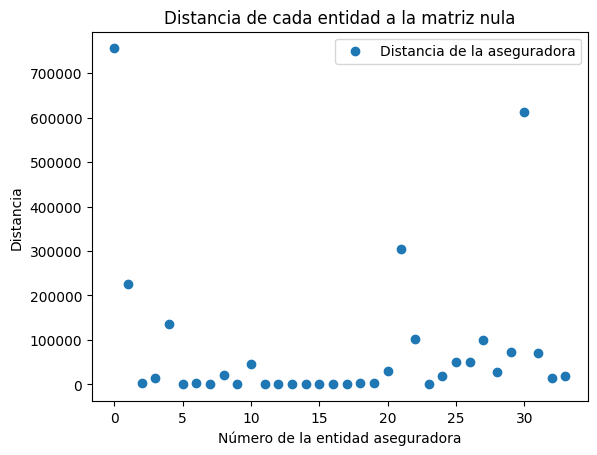

In [30]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd

# This code makes a descriptive analysis of the data to analyze the quality of the data

print ("Length of run-off rectangles dictionary : %d" % len (dictionary3))

# In this part we analize the possible outliers in the data set using the Frobenius metric compare with the nule matrix


x = []
y = []
for i in range(34):
  n = np.linalg.norm(dictionary3[Names[i]]-np.zeros((10,10)), 'fro')
  x = np.append(x, [n])
  if n<10000:
    y = np.append(y, [Names[i]])

print("\n \n Result of the distances : ", x)
print(len(x))

print("\n \n Result of the matrices non zero : ", y)
print(len(y))

plt.scatter(np.arange(34), x, label='Distancia de la aseguradora')

plt.title("Distancia de cada entidad a la matriz nula")
plt.xlabel("Número de la entidad aseguradora")
plt.ylabel("Distancia")
plt.legend()

plt.show()

In [31]:
def array_to_bmatrix(array):
    begin = '\\begin{bmatrix} \n'
    data = ''
    for line in array:
        if line.size == 1:
            data = data + ' %.3f &'%line
            data = data + r' \\'
            data = data + '\n'
            continue
        for element in line:
            data = data + ' %.3f &'%element

        data = data + r' \\'
        data = data + '\n'
    end = '\end{bmatrix}'
    print (begin + data + end)

In [32]:
B

array([[  174.52941176,  1389.94117647,  2795.70588235,  3871.05882353,
         4856.38235294,  5351.08823529,  5835.14705882,  6060.82352941,
         6275.70588235,  6389.38235294],
       [  277.44117647,  1525.14705882,  2911.05882353,  4387.32352941,
         5164.35294118,  5811.47058824,  6213.        ,  6411.35294118,
         6550.20588235,  6601.61764706],
       [  352.82352941,  1610.05882353,  3498.94117647,  4814.55882353,
         5599.73529412,  6293.29411765,  6623.5       ,  6932.85294118,
         7107.79411765,  7191.29411765],
       [  279.91176471,  2159.41176471,  4304.32352941,  5860.64705882,
         7205.5       ,  7656.85294118,  8115.38235294,  8400.85294118,
         8587.61764706,  8657.58823529],
       [  367.02941176,  2300.35294118,  4629.41176471,  6175.26470588,
         7177.        ,  7853.14705882,  8338.67647059,  8582.26470588,
         8846.26470588,  8981.61764706],
       [  536.14705882,  2667.94117647,  4891.91176471,  6702.67647059,
   

In [33]:
array_to_bmatrix(C)

\begin{bmatrix} 
 895.898 & 56821.661 & 229881.511 & 440738.130 & 693660.281 & 842180.744 & 1001439.447 & 1080399.466 & 1158367.186 & 1200711.966 & \\
 1589.085 & 64436.333 & 230927.460 & 525347.370 & 730112.966 & 906436.050 & 1055297.059 & 1112554.156 & 1158551.773 & 1177610.150 & \\
 3661.307 & 75299.654 & 351890.414 & 663200.321 & 897401.518 & 1111809.428 & 1232154.596 & 1348764.478 & 1417308.987 & 1448306.375 & \\
 2304.429 & 118875.161 & 501995.121 & 859759.777 & 1264729.596 & 1438235.066 & 1633032.323 & 1760555.689 & 1846579.900 & 1879336.849 & \\
 3665.581 & 134738.550 & 468100.183 & 805501.749 & 1120399.529 & 1199120.675 & 1255556.712 & 1346141.369 & 1315673.082 & 1369463.465 & \\
 6922.578 & 171385.647 & 455861.007 & 767905.695 & 1239039.819 & 1527485.002 & 1710242.654 & 1896635.989 & 1976072.632 & 2065931.000 & \\
 1004.059 & 132265.271 & 383840.625 & 508491.747 & 864396.271 & 1098193.226 & 1170657.872 & 998675.215 & 1115780.639 & 1174601.529 & \\
 7272.711 & 144250.921 & 655

Del gráfico anterior es posible apreciar que existen algunas aseguradoras que se encuentran distanciadas en mayor medida a la media que el resto de entidades. Por lo cual, este hecho nos brinda indicios de outliers en la base de datos ya que existen entidades aseguradoras que tienen un comportamiento considerablemente disimil al resto de entidades. Este hallazgo ciertamente es un aspecto importante tener en cuenta ya que al momento de desarrollar el modelo el comportamiento diferenciado que tienen algunos grupos de aseguradoras conlleva a un análisis de los datos distinto.

A continuación se presentan diagramas de dispersión que permiten comparar y analizar el comportamiento de todas las aseguradoras con respecto a una aseguradora fija con el fin de encontrar datos que resulten irregulares.


 
 Results of distances around insurer 0 Scpie Indemnity Co

 
 Result of the distances :  [     0.         541303.53176291 753336.07866012 749078.25359638
 636385.11439851 755632.44064426 754113.24490623 754932.70930527
 743601.5420183  755632.44064426 740734.31275593 755394.72085063
 755344.34014428 755035.18119688 755002.37948367 755538.69675616
 755444.27948327 755632.44064426 754098.92540701 754411.59266875
 727418.11576012 479327.46535432 664854.13358947 755632.41910204
 738659.62019729 713599.73276691 710457.77510771 659215.35157413
 730665.88122274 683528.5324959  264764.52715385 689003.83883401
 742062.74606936 739956.03241341]
34


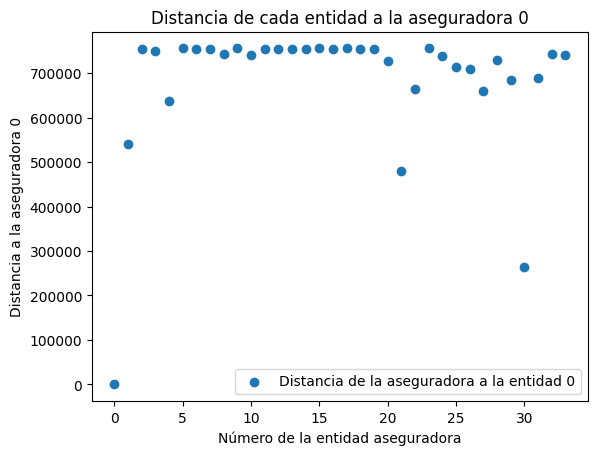


 
 Results of distances around insurer 1 Promutual Grp

 
 Result of the distances :  [541303.53176291      0.         223313.23984484 219993.91222486
 126374.13230167 225623.03299752 224178.08472284 225069.50037266
 214805.70566677 225623.03299752 216982.32360033 225430.60071783
 225322.46665834 225073.06682498 224998.98110658 225517.80382267
 225468.84725611 225623.03299752 224159.85671614 224456.94555081
 198732.4674204  126390.49442106 144399.43486732 225623.02531213
 209119.69181069 187887.84109143 181970.24852981 133910.28138272
 200875.67385824 158224.57070569 396457.4481858  159842.22267286
 212128.83878671 210545.52894327]
34


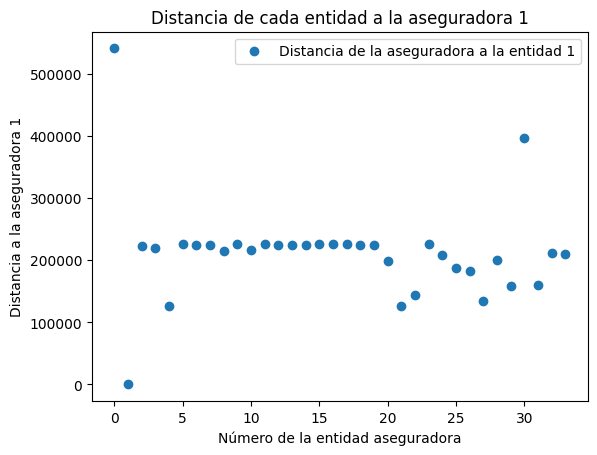


 
 Results of distances around insurer 2 Great Amer Grp

 
 Result of the distances :  [753336.07866012 223313.23984484      0.          14789.50147909
 133361.53632513   4081.67159384   3917.78049411   4107.77457999
  19385.19803871   4081.67159384  45023.92147514   4134.41918533
   3641.26310502   3750.36744866   3134.53361762   4093.69600728
   3913.31585743   4081.67159384   3259.4080751    3398.61824864
  26918.71261781 303040.31281663  99701.16279161   4081.6760038
  16666.45478199  47084.00063716  47147.72113263  97656.54369268
  24271.65367255  70500.33467296 609417.27044776  67300.60013848
  12454.10249677  16774.72402157]
34


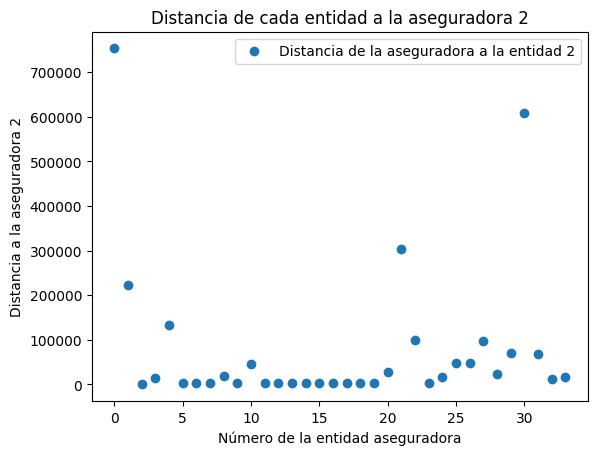


 
 Results of distances around insurer 3 Nationwide Grp

 
 Result of the distances :  [749078.25359638 219993.91222486  14789.50147909      0.
 128615.91277521  15002.90921788  12859.84494463  13568.16339819
  17172.32910819  15002.90921788  30990.57509954  14366.70783443
  14814.67424549  14028.61611136  14592.3200006   15006.18502485
  14783.58870505  15002.90921788  13583.37082612  13177.15014713
  24699.07943629 296072.50180319  93294.97028243  15002.91041765
  19679.07845911  41467.77165462  42074.51088248  93353.79576643
  25206.20372051  67555.01921397 604843.64327816  63359.20213355
  18432.89453667  14771.48922756]
34


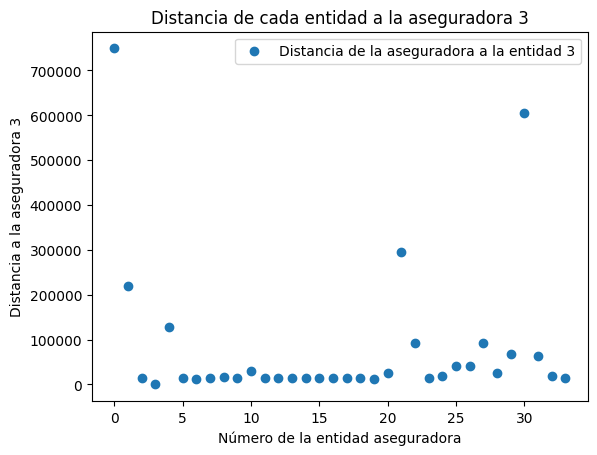


 
 Results of distances around insurer 4 Markel Corp Grp

 
 Result of the distances :  [636385.11439851 126374.13230167 133361.53632513 128615.91277521
      0.         136455.84542994 134562.22786131 135612.28568607
 118970.01385223 136455.84542994 124664.07140792 136179.0205832
 136047.4827404  135708.46934145 135531.39667251 136419.84416499
 136206.33922839 136455.84542994 134800.98816403 134770.65401266
 109462.50473107 179426.75183205  53482.67942989 136455.82792977
 119316.84129242  89877.43990012  89330.60795159  51718.44801422
 113123.89009842  79565.75459329 491532.66710667  76941.32721756
 124549.87060612 119403.57765578]
34


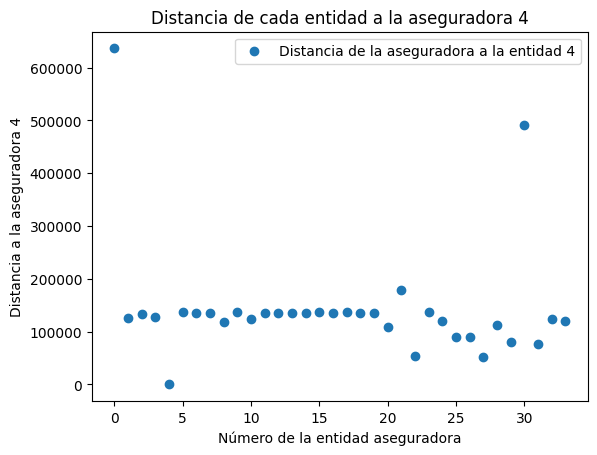


 
 Results of distances around insurer 5 Overseas Partners Us Reins Co

 
 Result of the distances :  [7.55632441e+05 2.25623033e+05 4.08167159e+03 1.50029092e+04
 1.36455845e+05 0.00000000e+00 2.58671007e+03 1.52756506e+03
 2.21075045e+04 0.00000000e+00 4.48601094e+04 6.81333252e+02
 6.27582664e+02 1.05979951e+03 1.16214887e+03 3.13534687e+02
 4.07322968e+02 0.00000000e+00 2.66076079e+03 2.14954809e+03
 2.93287632e+04 3.05603133e+05 1.02357368e+05 6.00000000e+00
 1.91813501e+04 4.99993280e+04 4.99728883e+04 1.00309512e+05
 2.68664998e+04 7.28127477e+04 6.11920188e+05 6.96293864e+04
 1.47332568e+04 1.93730268e+04]
34


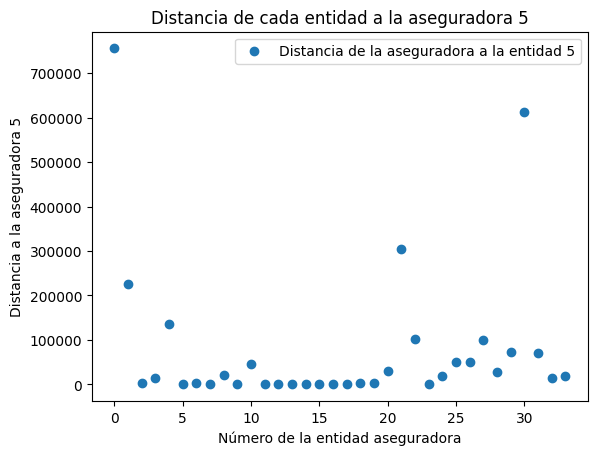


 
 Results of distances around insurer 6 Eastern Dentists Ins Co RRG

 
 Result of the distances :  [754113.24490623 224178.08472284   3917.78049411  12859.84494463
 134562.22786131   2586.71007266      0.           1483.10350279
  20442.56796491   2586.71007266  42980.21546014   2139.43871144
   2418.73830747   1719.98430225   2283.98445704   2605.64253112
   2288.26943344   2586.71007266   2308.16702169   1320.72252953
  27699.16040244 303639.07420489 100491.08250984   2586.7170313
  17763.1520007   48053.92158815  48066.55053153  98638.36372325
  25622.60806397  71391.40939217 610330.8749408   68021.80360002
  13846.499016    17468.80957593]
34


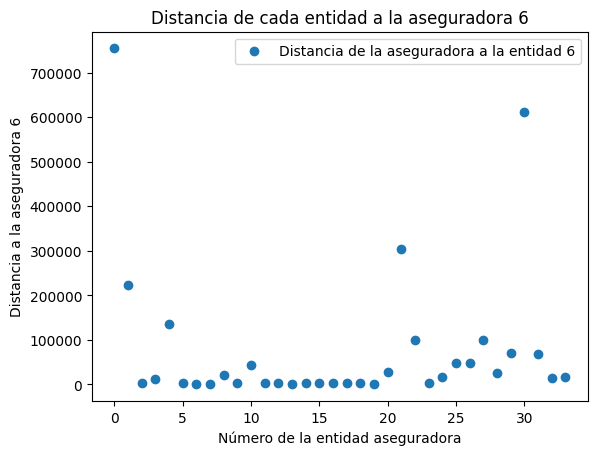


 
 Results of distances around insurer 7 American Assoc Of Othodontists RRG

 
 Result of the distances :  [7.54932709e+05 2.25069500e+05 4.10777458e+03 1.35681634e+04
 1.35612286e+05 1.52756506e+03 1.48310350e+03 0.00000000e+00
 2.12492512e+04 1.52756506e+03 4.34239116e+04 9.25785072e+02
 1.48827988e+03 6.88780081e+02 1.57867254e+03 1.55940982e+03
 1.29245464e+03 1.52756506e+03 2.09911481e+03 1.28511400e+03
 2.85140972e+04 3.04660092e+05 1.01397155e+05 1.52757684e+03
 1.86899270e+04 4.89862019e+04 4.90459688e+04 9.95457998e+04
 2.63601969e+04 7.21324277e+04 6.11254430e+05 6.89168821e+04
 1.44709346e+04 1.84021090e+04]
34


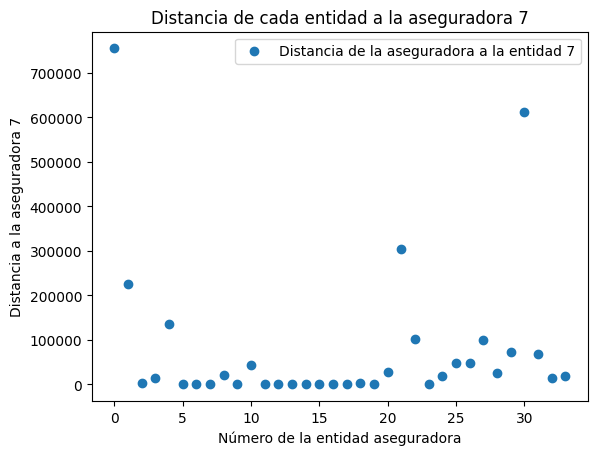


 
 Results of distances around insurer 8 Controlled Risk Ins Co Of VT Inc

 
 Result of the distances :  [743601.5420183  214805.70566677  19385.19803871  17172.32910819
 118970.01385223  22107.50447246  20442.56796491  21249.25121034
      0.          22107.50447246  39593.27793957  21800.47061419
  21653.29152808  21355.48095923  21032.46809103  22109.72767811
  21877.07878123  22107.50447246  21080.52935768  20184.42649668
  20312.79394864 289705.12790595  88140.17385392  22107.50528667
  19144.64839061  33661.05653422  35731.41462355  87316.39985135
  21506.89859092  62642.77908905 598184.03617532  57998.11277964
  19930.25549259  16971.01932708]
34


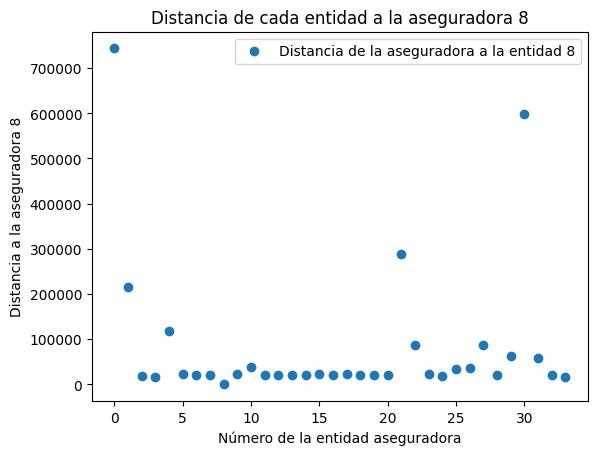


 
 Results of distances around insurer 9 Texas Medical Ins Co

 
 Result of the distances :  [7.55632441e+05 2.25623033e+05 4.08167159e+03 1.50029092e+04
 1.36455845e+05 0.00000000e+00 2.58671007e+03 1.52756506e+03
 2.21075045e+04 0.00000000e+00 4.48601094e+04 6.81333252e+02
 6.27582664e+02 1.05979951e+03 1.16214887e+03 3.13534687e+02
 4.07322968e+02 0.00000000e+00 2.66076079e+03 2.14954809e+03
 2.93287632e+04 3.05603133e+05 1.02357368e+05 6.00000000e+00
 1.91813501e+04 4.99993280e+04 4.99728883e+04 1.00309512e+05
 2.68664998e+04 7.28127477e+04 6.11920188e+05 6.96293864e+04
 1.47332568e+04 1.93730268e+04]
34


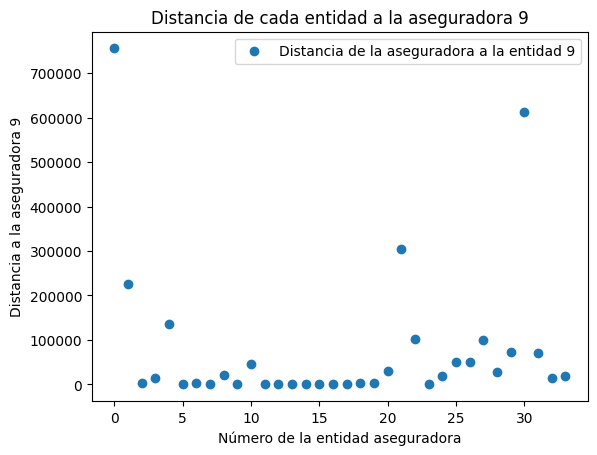


 
 Results of distances around insurer 10 MCIC VT Inc RRG

 
 Result of the distances :  [740734.31275593 216982.32360033  45023.92147514  30990.57509954
 124664.07140792  44860.10938462  42980.21546014  43423.91158106
  39593.27793957  44860.10938462      0.          44188.76423934
  44759.87468705  43960.92980136  44604.85359241  44861.205044
  44696.62029729  44860.10938462  43410.52063728  43339.23618386
  41565.60113844 284647.47573622  85548.72204189  44860.10978587
  44581.76367081  44932.80969403  46640.42352938  91254.81032252
  45594.00463877  70603.69889744 597331.94448397  66165.58336477
  45457.87146359  37611.40004041]
34


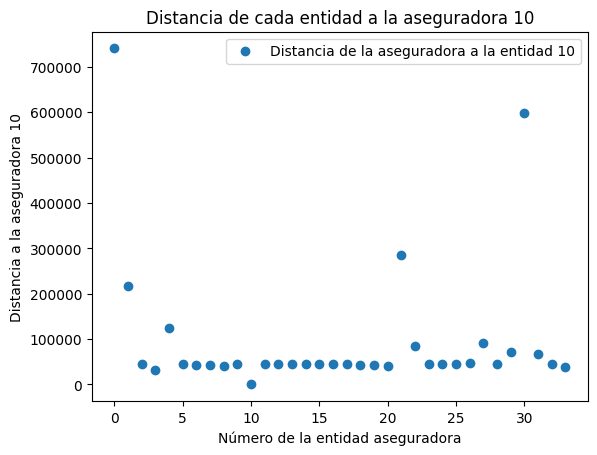


 
 Results of distances around insurer 11 Franklin Cas Ins Co RRG

 
 Result of the distances :  [7.55394721e+05 2.25430601e+05 4.13441919e+03 1.43667078e+04
 1.36179021e+05 6.81333252e+02 2.13943871e+03 9.25785072e+02
 2.18004706e+04 6.81333252e+02 4.41887642e+04 0.00000000e+00
 8.48876316e+02 5.98885632e+02 1.20126808e+03 7.50012667e+02
 6.36943483e+02 6.81333252e+02 2.35636012e+03 1.73966376e+03
 2.90462020e+04 3.05251740e+05 1.01978962e+05 6.81359670e+02
 1.90405663e+04 4.96319799e+04 4.96253903e+04 1.00033702e+05
 2.66922611e+04 7.25805395e+04 6.11680346e+05 6.93675337e+04
 1.46666141e+04 1.90047567e+04]
34


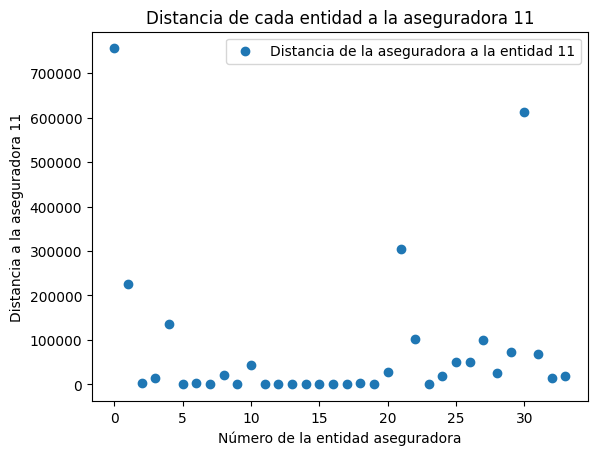


 
 Results of distances around insurer 12 Homestead Ins Co

 
 Result of the distances :  [7.55344340e+05 2.25322467e+05 3.64126311e+03 1.48146742e+04
 1.36047483e+05 6.27582664e+02 2.41873831e+03 1.48827988e+03
 2.16532915e+04 6.27582664e+02 4.47598747e+04 8.48876316e+02
 0.00000000e+00 9.48825063e+02 7.90527672e+02 7.01544011e+02
 6.16674955e+02 6.27582664e+02 2.41478156e+03 1.81424337e+03
 2.89778465e+04 3.05240762e+05 1.01986190e+05 6.27611345e+02
 1.88622111e+04 4.95931942e+04 4.95842547e+04 9.99542581e+04
 2.64968969e+04 7.25096450e+04 6.11565680e+05 6.92850425e+04
 1.44353033e+04 1.90081218e+04]
34


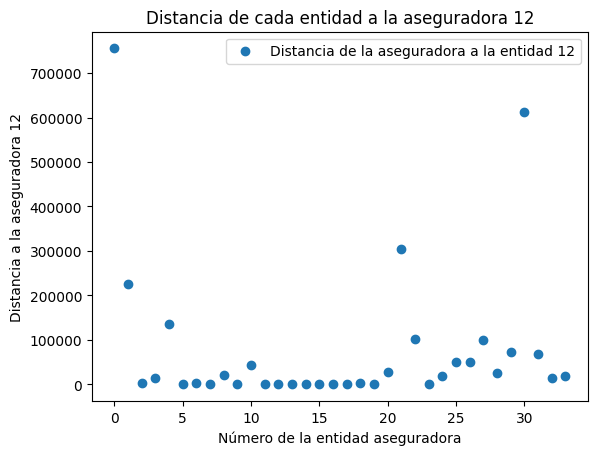


 
 Results of distances around insurer 13 Campmed Cas & Ind Co Inc MD

 
 Result of the distances :  [7.55035181e+05 2.25073067e+05 3.75036745e+03 1.40286161e+04
 1.35708469e+05 1.05979951e+03 1.71998430e+03 6.88780081e+02
 2.13554810e+04 1.05979951e+03 4.39609298e+04 5.98885632e+02
 9.48825063e+02 0.00000000e+00 1.05750225e+03 1.10520541e+03
 8.42055224e+02 1.05979951e+03 1.99724385e+03 1.27605643e+03
 2.86381292e+04 3.04807032e+05 1.01539318e+05 1.05981649e+03
 1.86587719e+04 4.91500914e+04 4.91630857e+04 9.96197067e+04
 2.63219758e+04 7.22219064e+04 6.11292782e+05 6.89907349e+04
 1.43535335e+04 1.85277937e+04]
34


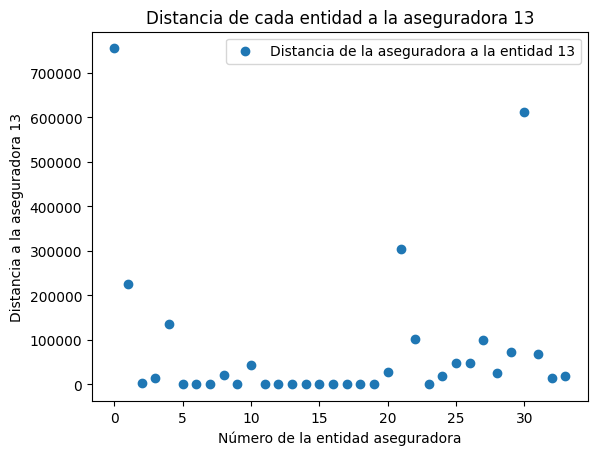


 
 Results of distances around insurer 14 Community Blood Cntr Exch RRG

 
 Result of the distances :  [755002.37948367 224998.98110658   3134.53361762  14592.3200006
 135531.39667251   1162.1488717    2283.98445704   1578.67254363
  21032.46809103   1162.1488717   44604.85359241   1201.26807999
    790.52767187   1057.50224586      0.           1203.70012877
   1063.52715057   1162.1488717    2377.30982415   1516.17841958
  28545.2969156  304815.49269517 101563.94021994   1162.16436015
  18495.61769717  49081.1602858   49105.01737094  99547.34818668
  26099.83722171  72152.22818458 611192.85844568  68914.22452586
  14119.79334126  18637.47040239]
34


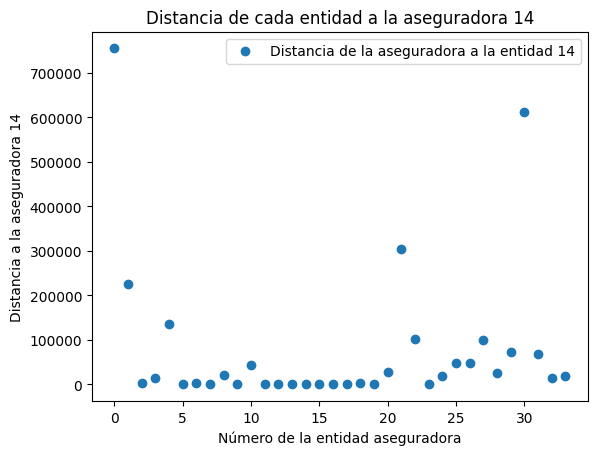


 
 Results of distances around insurer 15 Underwriters At Lloyds London

 
 Result of the distances :  [7.55538697e+05 2.25517804e+05 4.09369601e+03 1.50061850e+04
 1.36419844e+05 3.13534687e+02 2.60564253e+03 1.55940982e+03
 2.21097277e+04 3.13534687e+02 4.48612050e+04 7.50012667e+02
 7.01544011e+02 1.10520541e+03 1.20370013e+03 0.00000000e+00
 5.14019455e+02 3.13534687e+02 2.67917002e+03 2.17229395e+03
 2.92327530e+04 3.05552656e+05 1.02330920e+05 3.13572958e+02
 1.91793765e+04 4.99935598e+04 4.99167108e+04 1.00254382e+05
 2.68325142e+04 7.27103763e+04 6.11847357e+05 6.95557179e+04
 1.46746381e+04 1.93729717e+04]
34


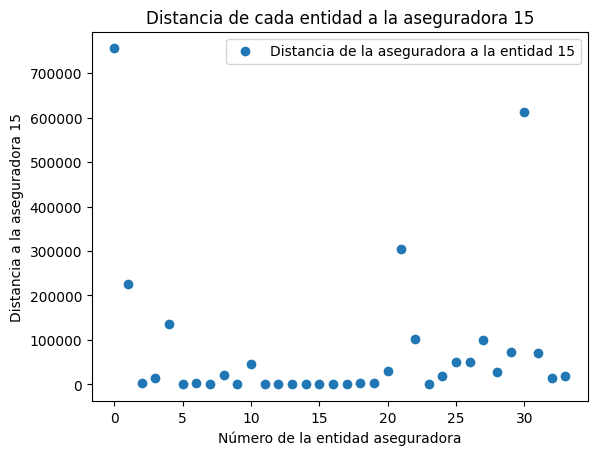


 
 Results of distances around insurer 16 NCMIC Ins Co

 
 Result of the distances :  [7.55444279e+05 2.25468847e+05 3.91331586e+03 1.47835887e+04
 1.36206339e+05 4.07322968e+02 2.28826943e+03 1.29245464e+03
 2.18770788e+04 4.07322968e+02 4.46966203e+04 6.36943483e+02
 6.16674955e+02 8.42055224e+02 1.06352715e+03 5.14019455e+02
 0.00000000e+00 4.07322968e+02 2.50175339e+03 1.90949863e+03
 2.91070883e+04 3.05377112e+05 1.02152682e+05 4.07367156e+02
 1.89908406e+04 4.97489729e+04 4.97517612e+04 1.00116745e+05
 2.67172950e+04 7.26304865e+04 6.11750325e+05 6.94557787e+04
 1.46041822e+04 1.91395348e+04]
34


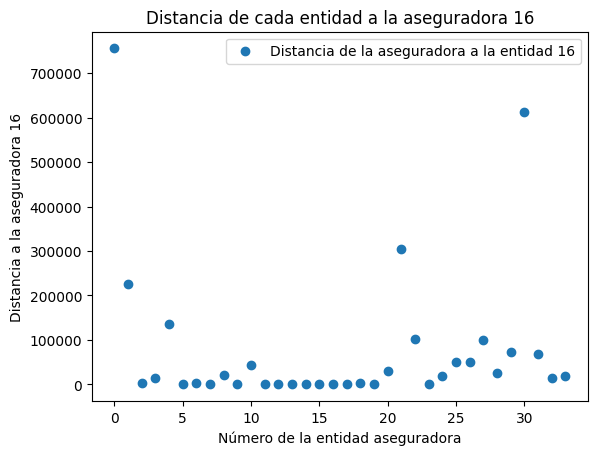


 
 Results of distances around insurer 17 National American Ins Co

 
 Result of the distances :  [7.55632441e+05 2.25623033e+05 4.08167159e+03 1.50029092e+04
 1.36455845e+05 0.00000000e+00 2.58671007e+03 1.52756506e+03
 2.21075045e+04 0.00000000e+00 4.48601094e+04 6.81333252e+02
 6.27582664e+02 1.05979951e+03 1.16214887e+03 3.13534687e+02
 4.07322968e+02 0.00000000e+00 2.66076079e+03 2.14954809e+03
 2.93287632e+04 3.05603133e+05 1.02357368e+05 6.00000000e+00
 1.91813501e+04 4.99993280e+04 4.99728883e+04 1.00309512e+05
 2.68664998e+04 7.28127477e+04 6.11920188e+05 6.96293864e+04
 1.47332568e+04 1.93730268e+04]
34


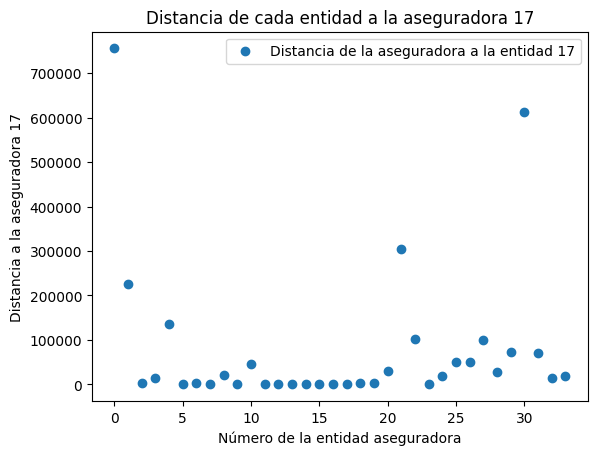


 
 Results of distances around insurer 18 Michigan Professional Ins Exch

 
 Result of the distances :  [754098.92540701 224159.85671614   3259.4080751   13583.37082612
 134800.98816403   2660.76079346   2308.16702169   2099.11481344
  21080.52935768   2660.76079346  43410.52063728   2356.36011679
   2414.78156362   1997.24385091   2377.30982415   2679.17002073
   2501.75338513   2660.76079346      0.           2213.31267561
  27871.22932344 303849.51169781 100323.90268027   2660.76755843
  17769.17550141  48133.74430688  48080.07449037  98554.13821347
  25430.03851747  71301.75171761 610389.63762584  68138.89260914
  13480.02566763  17145.88297522]
34


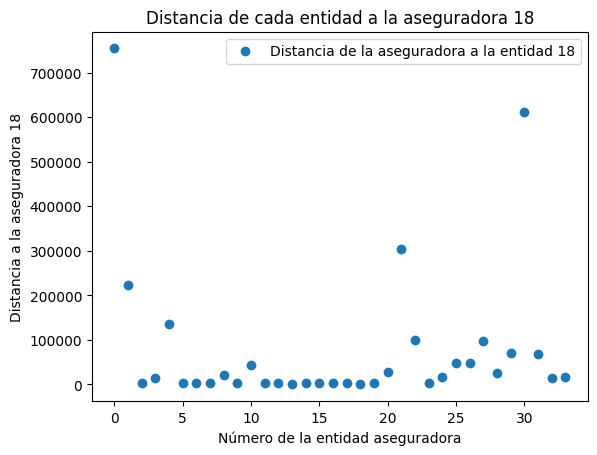


 
 Results of distances around insurer 19 Nichido Fire & Marine Ins Co Ltd

 
 Result of the distances :  [754411.59266875 224456.94555081   3398.61824864  13177.15014713
 134770.65401266   2149.54809204   1320.72252953   1285.11400273
  20184.42649668   2149.54809204  43339.23618386   1739.66376062
   1814.24336846   1276.05642508   1516.17841958   2172.2939488
   1909.49862529   2149.54809204   2213.31267561      0.
  27846.53445224 303919.78011311 100745.07963171   2149.55646588
  18077.55550399  48203.59131849  48292.17810371  98876.54151516
  25663.132038    71590.4401509  610539.64694031  68241.14151302
  13956.7809684   17806.83217195]
34


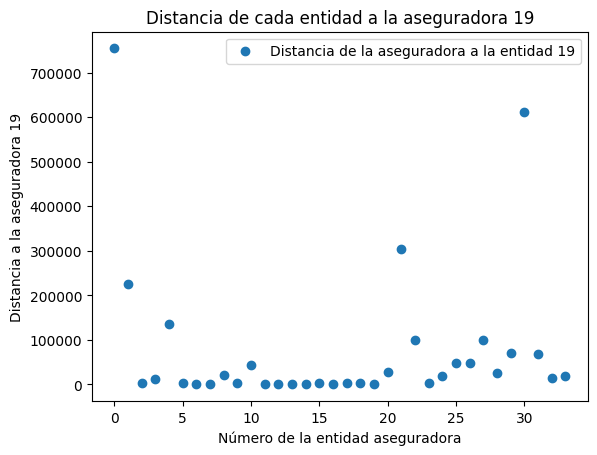


 
 Results of distances around insurer 20 Texas Hospital Ins Exch

 
 Result of the distances :  [727418.11576012 198732.4674204   26918.71261781  24699.07943629
 109462.50473107  29328.76315155  27699.16040244  28514.0971977
  20312.79394864  29328.76315155  41565.60113844  29046.20204089
  28977.84650384  28638.12921613  28545.2969156   29232.75296649
  29107.0882776   29328.76315155  27871.22932344  27846.53445224
      0.         277668.23605699  76639.16289339  29328.71814451
  17179.97386494  26484.80245348  24452.23811842  72862.65425443
  11294.68144748  44838.43422779 584365.8929361   42723.79931607
  18497.38613967  17386.18316365]
34


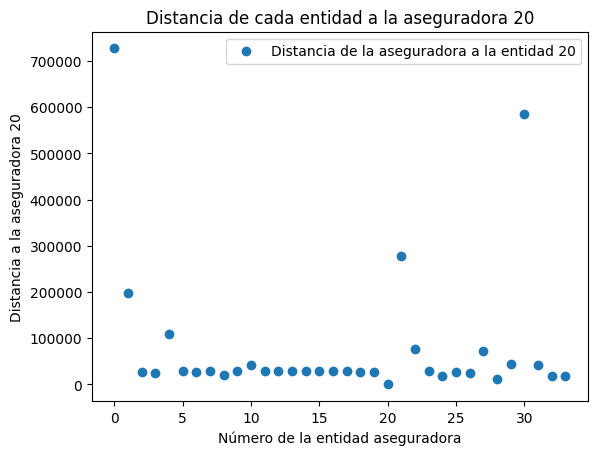


 
 Results of distances around insurer 21 State Volunteer Mut Ins Co

 
 Result of the distances :  [479327.46535432 126390.49442106 303040.31281663 296072.50180319
 179426.75183205 305603.13260665 303639.07420489 304660.09241776
 289705.12790595 305603.13260665 284647.47573622 305251.74045695
 305240.76150966 304807.03187427 304815.49269517 305552.65594493
 305377.1115015  305603.13260665 303849.51169781 303919.78011311
 277668.23605699      0.         208958.2259448  305603.12791429
 288638.12131976 258691.15991081 257038.58776845 209137.89166481
 281060.81043433 239656.0612482  330355.60787733 239114.2930546
 293045.50111715 288117.72423785]
34


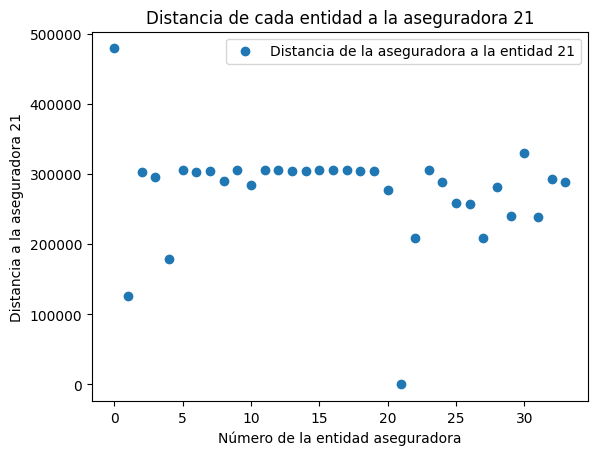


 
 Results of distances around insurer 22 MHA Ins Co

 
 Result of the distances :  [664854.13358947 144399.43486732  99701.16279161  93294.97028243
  53482.67942989 102357.36772211 100491.08250984 101397.15533485
  88140.17385392 102357.36772211  85548.72204189 101978.96218338
 101986.18975626 101539.3178035  101563.94021994 102330.92043464
 102152.68215275 102357.36772211 100323.90268027 100745.07963171
  76639.16289339 208958.2259448       0.         102357.36273957
  86213.87950324  57556.13034248  55406.75085222  24939.38182875
  78922.05573856  50379.0172691  519995.31198464  45037.84387601
  90769.83366185  83953.42193145]
34


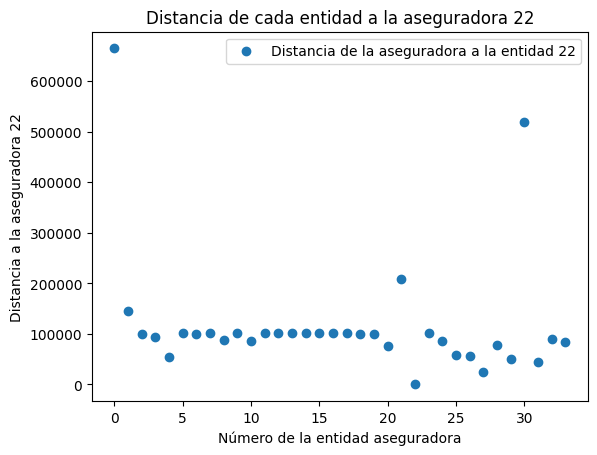


 
 Results of distances around insurer 23 Health Care Ind Inc

 
 Result of the distances :  [7.55632419e+05 2.25623025e+05 4.08167600e+03 1.50029104e+04
 1.36455828e+05 6.00000000e+00 2.58671703e+03 1.52757684e+03
 2.21075053e+04 6.00000000e+00 4.48601098e+04 6.81359670e+02
 6.27611345e+02 1.05981649e+03 1.16216436e+03 3.13572958e+02
 4.07367156e+02 6.00000000e+00 2.66076756e+03 2.14955647e+03
 2.93287181e+04 3.05603128e+05 1.02357363e+05 0.00000000e+00
 1.91813510e+04 4.99993245e+04 4.99728887e+04 1.00309472e+05
 2.68664993e+04 7.28126995e+04 6.11920185e+05 6.96293532e+04
 1.47332519e+04 1.93730277e+04]
34


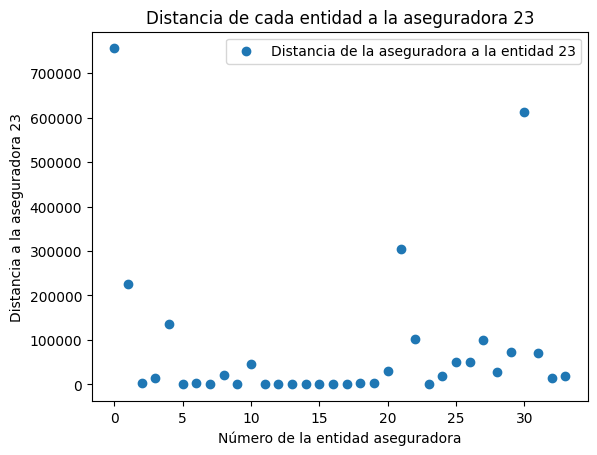


 
 Results of distances around insurer 24 National Guardian RRG Inc

 
 Result of the distances :  [738659.62019729 209119.69181069  16666.45478199  19679.07845911
 119316.84129242  19181.35005676  17763.1520007   18689.92704641
  19144.64839061  19181.35005676  44581.76367081  19040.56629935
  18862.21111111  18658.77190492  18495.61769717  19179.37652793
  18990.84063437  19181.35005676  17769.17550141  18077.55550399
  17179.97386494 288638.12131976  86213.87950324  19181.35099517
      0.          35152.9746252   34357.40046919  83148.81936023
  13993.77093567  57505.34869036 595253.29470991  53393.83417587
   7819.59487442  10622.17816646]
34


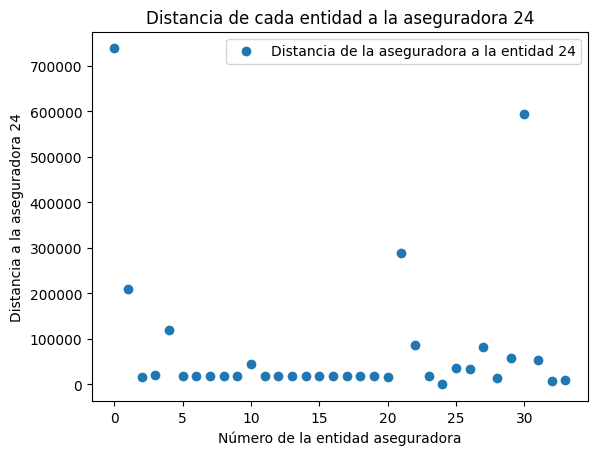


 
 Results of distances around insurer 25 Preferred Professional Ins Co

 
 Result of the distances :  [713599.73276691 187887.84109143  47084.00063716  41467.77165462
  89877.43990012  49999.32802548  48053.92158815  48986.20187359
  33661.05653422  49999.32802548  44932.80969403  49631.979892
  49593.19422058  49150.09135292  49081.1602858   49993.55979524
  49748.97286377  49999.32802548  48133.74430688  48203.59131849
  26484.80245348 258691.15991081  57556.13034248  49999.32454544
  35152.9746252       0.          14859.61803008  57865.27518296
  30422.9914374   40590.64629936 568930.60267839  34611.59419905
  39430.5148711   32801.62736817]
34


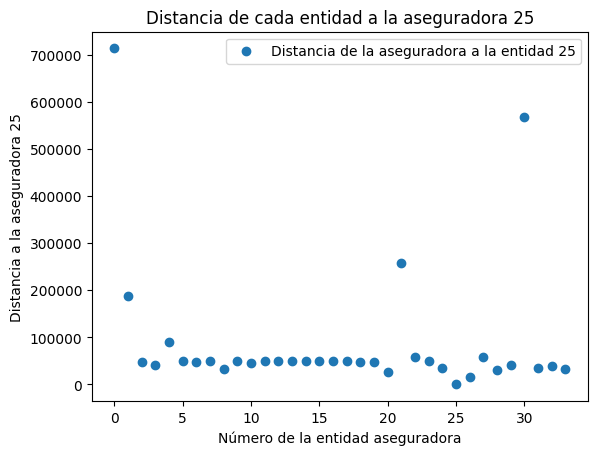


 
 Results of distances around insurer 26 Medical Mut Ins Co Of ME

 
 Result of the distances :  [710457.77510771 181970.24852981  47147.72113263  42074.51088248
  89330.60795159  49972.88829956  48066.55053153  49045.96882517
  35731.41462355  49972.88829956  46640.42352938  49625.39029569
  49584.25466819  49163.0857453   49105.01737094  49916.71083916
  49751.76120501  49972.88829956  48080.07449037  48292.17810371
  24452.23811842 257038.58776845  55406.75085222  49972.88865975
  34357.40046919  14859.61803008      0.          54545.06751302
  28313.2306175   34941.85989612 566151.42137948  29758.26381024
  38376.12542975  32697.30340563]
34


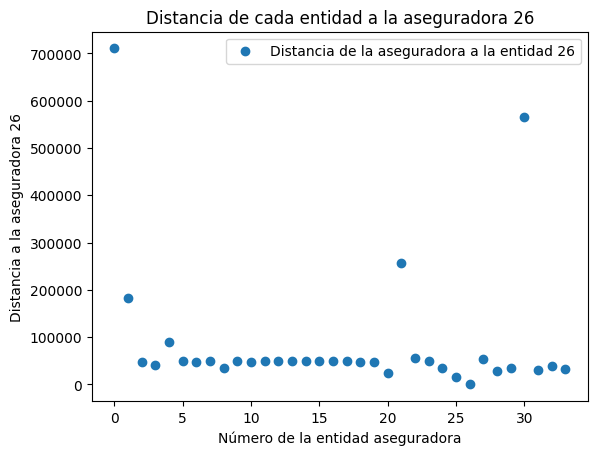


 
 Results of distances around insurer 27 Utah Medical Ins Assoc

 
 Result of the distances :  [659215.35157413 133910.28138272  97656.54369268  93353.79576643
  51718.44801422 100309.51228572  98638.36372325  99545.79983103
  87316.39985135 100309.51228572  91254.81032252 100033.70201087
  99954.2581234   99619.70670505  99547.34818668 100254.38191421
 100116.74487817 100309.51228572  98554.13821347  98876.54151516
  72862.65425443 209137.89166481  24939.38182875 100309.47185087
  83148.81936023  57865.27518296  54545.06751302      0.
  75167.92754892  38041.87423091 515269.17063026  34371.61990654
  87318.07742386  83175.77910666]
34


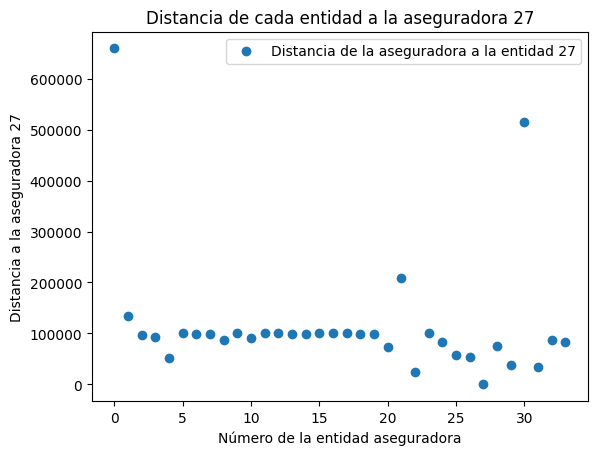


 
 Results of distances around insurer 28 Seguros Triples Inc

 
 Result of the distances :  [730665.88122274 200875.67385824  24271.65367255  25206.20372051
 113123.89009842  26866.49975341  25622.60806397  26360.19685055
  21506.89859092  26866.49975341  45594.00463877  26692.26108819
  26496.89693153  26321.97583769  26099.83722171  26832.5141759
  26717.29501652  26866.49975341  25430.03851747  25663.132038
  11294.68144748 281060.81043433  78922.05573856  26866.49930676
  13993.77093567  30422.9914374   28313.2306175   75167.92754892
      0.          48546.54789993 586367.78480575  45334.18706672
  14985.8059176   15950.3638203 ]
34


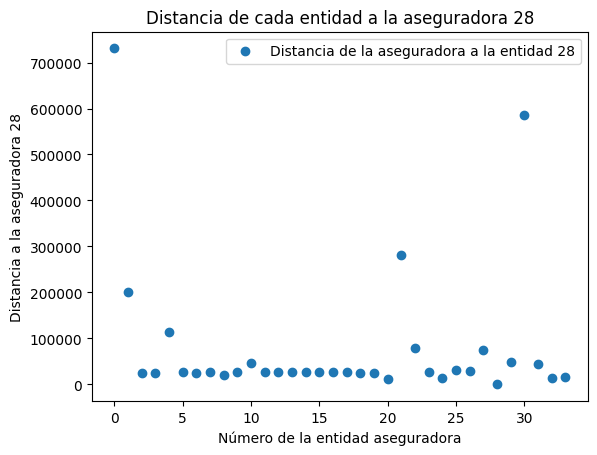


 
 Results of distances around insurer 29 Dentists Ins Co

 
 Result of the distances :  [683528.5324959  158224.57070569  70500.33467296  67555.01921397
  79565.75459329  72812.74774378  71391.40939217  72132.4276522
  62642.77908905  72812.74774378  70603.69889744  72580.53950612
  72509.64499982  72221.90642042  72152.22818458  72710.37626089
  72630.48654663  72812.74774378  71301.75171761  71590.4401509
  44838.43422779 239656.0612482   50379.0172691   72812.69953792
  57505.34869036  40590.64629936  34941.85989612  38041.87423091
  48546.54789993      0.         544608.68638409  24262.2411166
  59843.48271951  58758.68440495]
34


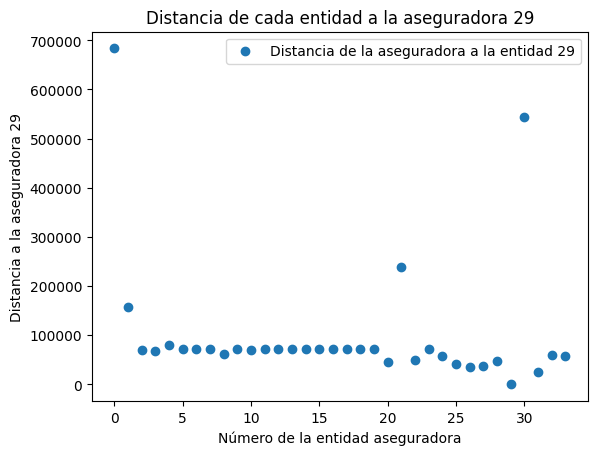


 
 Results of distances around insurer 30 Physicians Recip Insurers

 
 Result of the distances :  [264764.52715385 396457.4481858  609417.27044776 604843.64327816
 491532.66710667 611920.18778841 610330.8749408  611254.42993405
 598184.03617532 611920.18778841 597331.94448397 611680.34583269
 611565.67958397 611292.78158997 611192.85844568 611847.35660212
 611750.3252823  611920.18778841 610389.63762584 610539.64694031
 584365.8929361  330355.60787733 519995.31198464 611920.18528808
 595253.29470991 568930.60267839 566151.42137948 515269.17063026
 586367.78480575 544608.68638409      0.         543393.89766816
 598718.311194   595758.27609191]
34


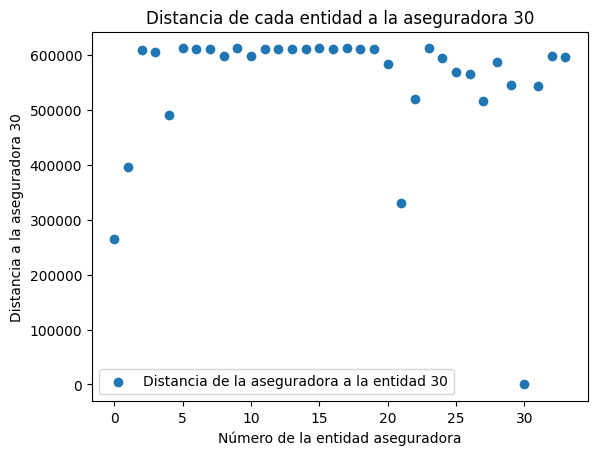


 
 Results of distances around insurer 31 Louisiana Med Mut Ins Co

 
 Result of the distances :  [689003.83883401 159842.22267286  67300.60013848  63359.20213355
  76941.32721756  69629.38635375  68021.80360002  68916.88211897
  57998.11277964  69629.38635375  66165.58336477  69367.53368111
  69285.04254166  68990.73489245  68914.22452586  69555.71793893
  69455.77866528  69629.38635375  68138.89260914  68241.14151302
  42723.79931607 239114.2930546   45037.84387601  69629.3531781
  53393.83417587  34611.59419905  29758.26381024  34371.61990654
  45334.18706672  24262.2411166  543393.89766816      0.
  56959.05503079  54085.91518131]
34


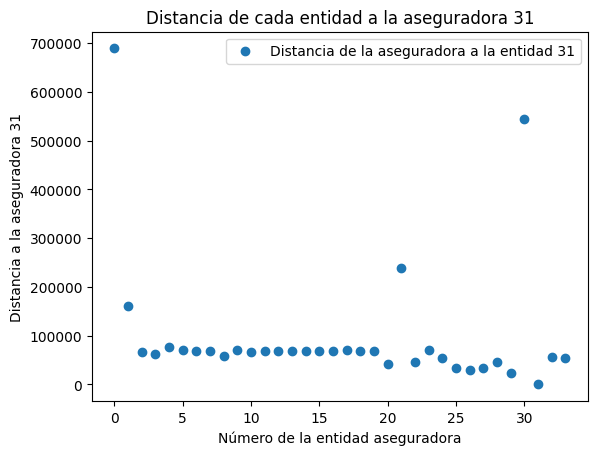


 
 Results of distances around insurer 32 Clinic Mut Ins Co RRG

 
 Result of the distances :  [742062.74606936 212128.83878671  12454.10249677  18432.89453667
 124549.87060612  14733.25680221  13846.499016    14470.93462773
  19930.25549259  14733.25680221  45457.87146359  14666.6140946
  14435.30332206  14353.53346741  14119.79334126  14674.63805346
  14604.18220922  14733.25680221  13480.02566763  13956.7809684
  18497.38613967 293045.50111715  90769.83366185  14733.25191531
   7819.59487442  39430.5148711   38376.12542975  87318.07742386
  14985.8059176   59843.48271951 598718.311194    56959.05503079
      0.          12568.23364678]
34


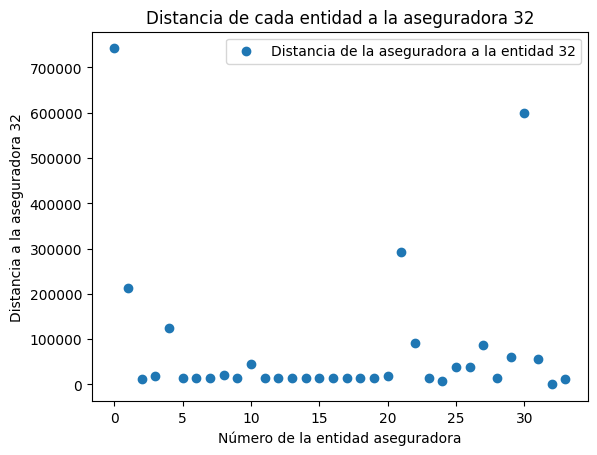


 
 Results of distances around insurer 33 California Healthcare Ins Co Inc

 
 Result of the distances :  [739956.03241341 210545.52894327  16774.72402157  14771.48922756
 119403.57765578  19373.02678984  17468.80957593  18402.10900957
  16971.01932708  19373.02678984  37611.40004041  19004.75672036
  19008.12176413  18527.7936625   18637.47040239  19372.97166157
  19139.53481671  19373.02678984  17145.88297522  17806.83217195
  17386.18316365 288117.72423785  83953.42193145  19373.02771897
  10622.17816646  32801.62736817  32697.30340563  83175.77910666
  15950.3638203   58758.68440495 595758.27609191  54085.91518131
  12568.23364678      0.        ]
34


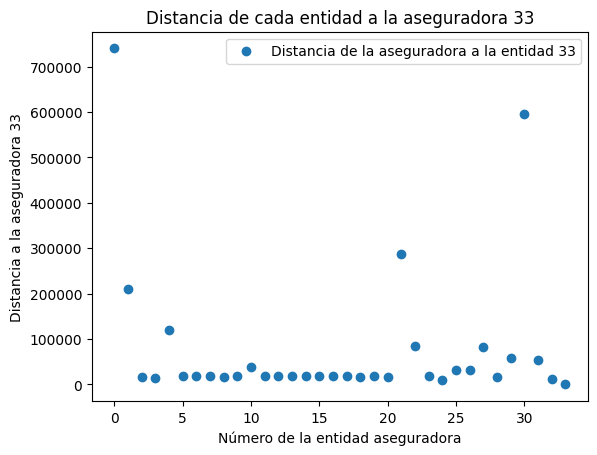

In [34]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd

# In this part we analize the possible modes in the data set using the Frobenius metric

y = []
for j in range(34):
  y = []

  for i in range(34):
    n = np.linalg.norm(dictionary3[Names[i]]-dictionary3[Names[j]], 'fro')
    y = np.append(y, [n])

  print ("\n \n Results of distances around insurer %d" % j, Names[j])
  print("\n \n Result of the distances : ", y)
  print(len(y))
  plt.scatter(np.arange(34), y, label='Distancia de la aseguradora a la entidad %d' % j)

  plt.title("Distancia de cada entidad a la aseguradora %d" % j)
  plt.xlabel("Número de la entidad aseguradora")
  plt.ylabel("Distancia a la aseguradora %d" % j)
  plt.legend()

  plt.show()

De los resultados obtenidos en las gráficas previas es notorio que existe un grupo común de aseguradoras que se mantienen muy cercanas en su comportamiento y en los datos registrados en sus triangulos de perdida. Adicionalmente, las entidades que en instancias anteriores se encontraron como posibles outliers resultan ser las entidades que no se encuntran en el grupo comun de aseguradoras puesto que se distancian considerablemente del comportamiento promedio de los triangulos de perdida.

Las entidades aseguradoras que tienen un comportamiento disimil al promedio son:

1.   Scpie Indemnity Co
2.   Great Amer Grp
3.   State Volunteer Mut Ins Co
4.   Physicians Recip Insurers



In [35]:
# Run-off upper triangles in the variable CumPaidLoss_F2 for all the entities
dictionary1 = {}
for i in range(34):
  df1 = df.loc[df['GRCODE']== Codes[i]]
  df2 = df1.loc[df['DevelopmentYear'] <= 1997]

  raa_CumPaidLoss_F2 = cl.Triangle(
      df2,
      origin="AccidentYear",
      development="DevelopmentYear",
      columns="CumPaidLoss_F2",
      cumulative=False,
  )

  dictionary1[Names[i]] = raa_CumPaidLoss_F2

In [36]:
dictionary1['Community Blood Cntr Exch RRG']

,12,24,36,48,60,72,84,96,108,120
1988,,,,,,,,,,
1989,,,,,,,,,,
1990,,,,,,,,,,
1991,,,,,,,,,,
1992,,,,,,,,,,
1993,,,3.00,4.00,3.00,,,,,
1994,,32.00,75.00,83.00,,,,,,
1995,11.00,31.00,199.00,,,,,,,
1996,,,,,,,,,,
1997,,,,,,,,,,


In [37]:
df1 = dictionary1['Nationwide Grp'].to_frame()

In [38]:
df1.to_numpy()

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [ 1., nan, nan, nan, nan, nan, nan, nan, nan, nan]])

Los siguientes gráficos proveen información de la evolución de los datos en la variable de **CumPaidLoss_F2** para cada aseguradora, brindandonos así información sobre su comportamiento en el tiempo.

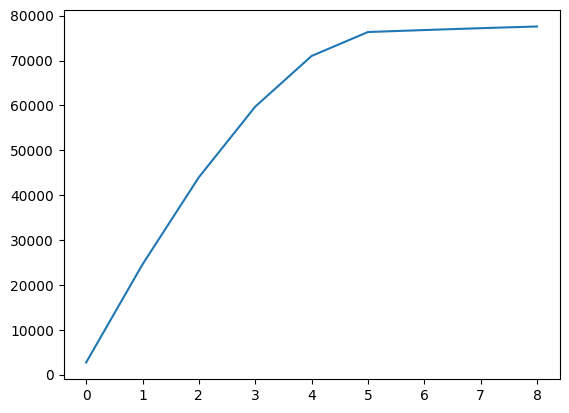

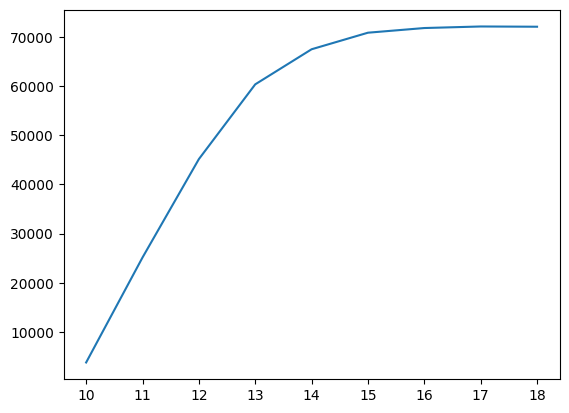

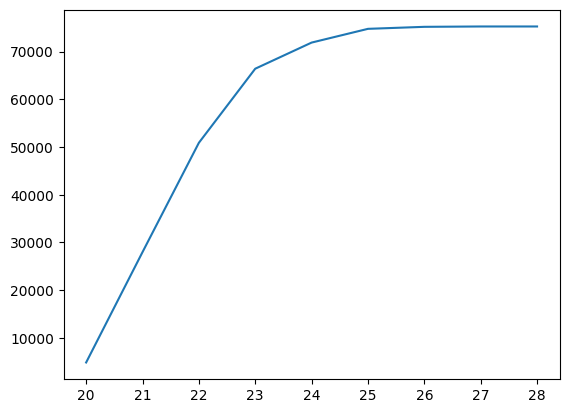

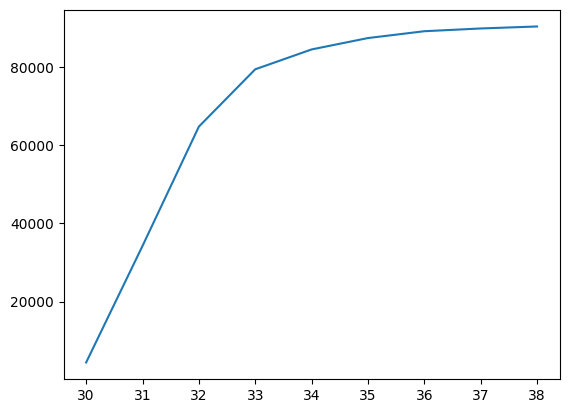

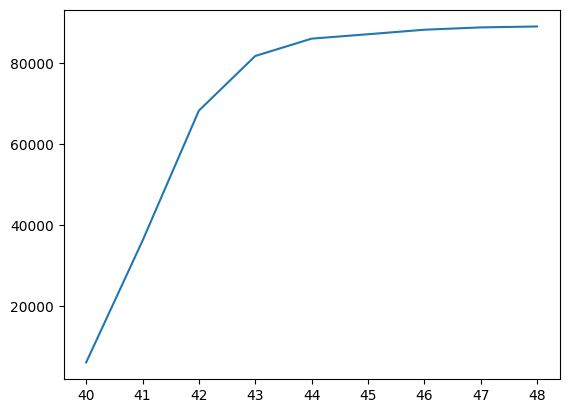

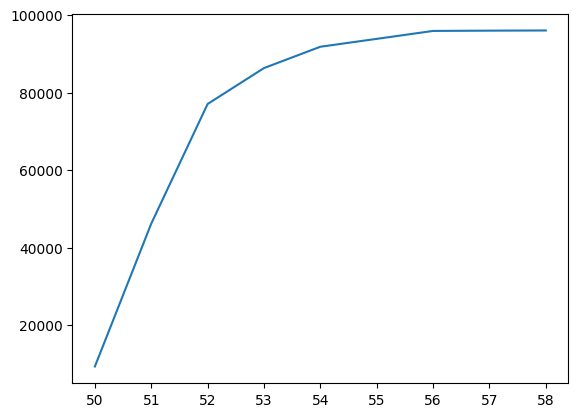

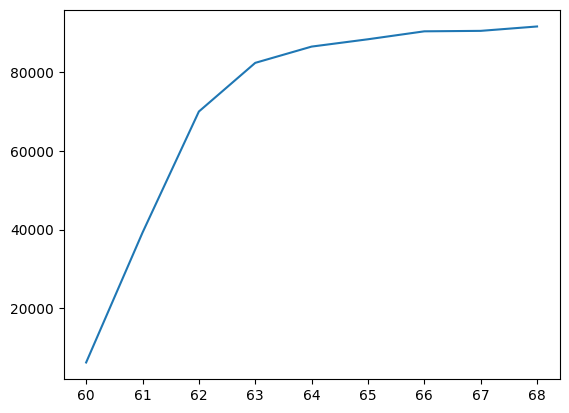

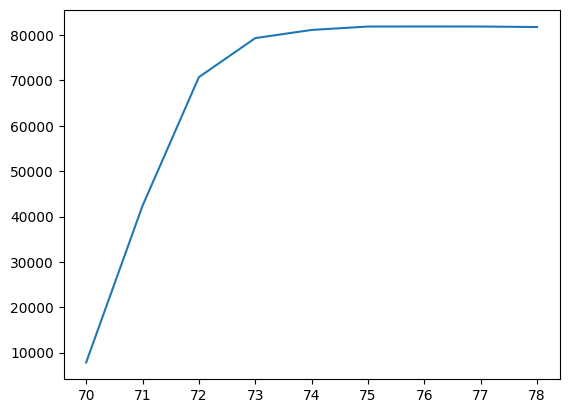

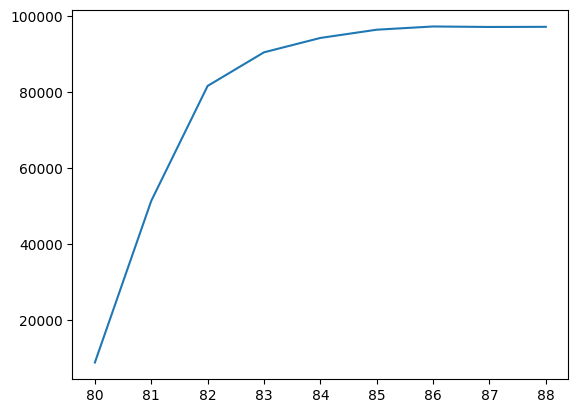

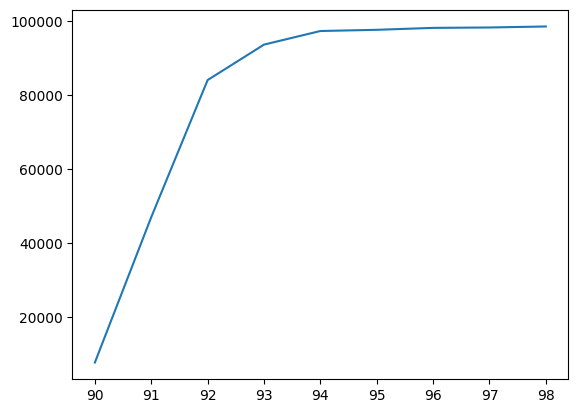

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

f1 = df['CumPaidLoss_F2']
# f2 = f1[0:10]
# f2.plot()

for i in range(10):
  f2 = f1[10*i:(10*i)+9]
  f2.plot()
  plt.show()


Como es de esperarse las pérdidas pagadas acumuladas y gastos asignados al final del año son una función creciente para cada uno de los años de accidentalidad por lo cual esta variable es coherente con lo que trata de representar y por ende da un buen indicio de la calidad de los datos.

# Fase de Preparación de los datos

En esta parte organizamos la información de los tringulos de perdida de cada una de las aseguradoras en los siguientes tres diccionarios, que posteriormente facilitaran el procesamiento de los datos en los modelos a desarrollar.

El primer diccionario almacena en un formato de dataframe los triángulos superiores de perdida para todas las aseguradoras en la variable **CumPaidLoss_F2** sin considerar las estimaciones del triangulo inferior.

In [39]:
# Run-off upper triangles in the variable CumPaidLoss_F2 for all the entities
dictionary1 = {}
for i in range(34):
  df1 = df.loc[df['GRCODE']== Codes[i]]
  df2 = df1.loc[df['DevelopmentYear'] <= 1997]

  raa_CumPaidLoss_F2 = cl.Triangle(
      df2,
      origin="AccidentYear",
      development="DevelopmentYear",
      columns="CumPaidLoss_F2",
      cumulative=False,
  )

  dictionary1[Names[i]] = raa_CumPaidLoss_F2

El segundo diccionario almacena en un formato de dataframe los cuadrados de perdida para todas las aseguradoras en la variable **CumPaidLoss_F2**. Aquí se almacena toda la información del triangulo superior y del triangulo inferior.

In [ ]:
# Run-off squares in the variable CumPaidLoss_F2 for all the entities
dictionary2 = {}
for i in range(34):
  df1 = df.loc[df['GRCODE']== Codes[i]]
  # df2 = df1.loc[df['DevelopmentYear'] <= 1997]

  raa_CumPaidLoss_F2 = cl.Triangle(
      df1,
      origin="AccidentYear",
      development="DevelopmentYear",
      columns="CumPaidLoss_F2",
      cumulative=False,
  )

  dictionary2[Names[i]] = raa_CumPaidLoss_F2

El tercer diccionario almacena en un formato de matriz los cuadrados de perdida para todas las aseguradoras en la variable **CumPaidLoss_F2**. Aquí se almacena toda la información del triangulo superior y del triangulo inferior como un array con el fin de alimentar los modelos a desarrollar posteriormente.

In [ ]:
import numpy as np

#Dictionary of square matrices in the variable CumPaidLoss_F2 for all the entities
dictionary3 = {}
for i in range(34):
  df1 = dictionary2[Names[i]].to_frame()
  A = df1.to_numpy()
  A[np.isnan(A)] = 0
  A = np.array(A)

  A = A[0:10,0:10]
  dictionary3[Names[i]] = A

## Selección y limpieza de los datos

Después de realizar una análisis exploratorio de los datos y de cada uno de los triángulos de perdida de las aseguradoras se pudo identificar que existían grupos de aseguradoras que no tenían registros en la variable **CumPaidLoss_F2** antes de 1993 por lo que el comportamiento que describirían en el modelo a desarrollar no capturaría correctamente el patrón de aprovisionamiento. Esto pudo ocurrir principalmente porque la recopilación de la información para ese entonces no existía en esos grupos de aseguradoras o porque las compañías no existían todavía.

De esta manera, las aseguradoras que tienen registros completos durante el periodo de análisis son las siguientes:

* Scpie Indemnity Co
* Promutual Grp
* Markel Corp Grp
* Texas Hospital Ins Exch
* State Volunteer Mut Ins Co
* MHA Ins Co
* Preferred Professional Ins Co
* Utah Medical Ins Assoc
* Seguros Triples Inc
* Dentists Ins Co
* Physicians Recip Insurers
* Clinic Mut Ins Co RRG



In [40]:
Names_final_3 = [Names[0], Names[1], Names[4], Names[20], Names[21], Names[22], Names[25], Names[27], Names[28], Names[29], Names[30], Names[32]]

In [42]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd

s = np.size(Names_final_3)
for i in range(s):
  print(Names_final_3[i])

np.size(Names_final_3)

Scpie Indemnity Co
Promutual Grp
Markel Corp Grp
Texas Hospital Ins Exch
State Volunteer Mut Ins Co
MHA Ins Co
Preferred Professional Ins Co
Utah Medical Ins Assoc
Seguros Triples Inc
Dentists Ins Co
Physicians Recip Insurers
Clinic Mut Ins Co RRG


12